<a href="https://colab.research.google.com/github/lups0208/datasciencecoursera/blob/master/Copia_de_3_Plantas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Se provee de una base de datos de plantas (actualizada hasta 2018). Cada fila es una planta. Los datos son a nivel SEN. Incluye BC y BCS

In [ ]:
plantas = pd.read_excel('https://github.com/IvanMGro/CENACE/raw/main/BDGPIIRCE.xlsx')

In [ ]:
plantas

Quiero conocer los combustibles utilizados en México

In [ ]:
plantas["Combustible"].unique()

array(['Gas Natural', nan, 'Diésel', 'Combustóleo ', 'Carbón', 'Uranio',
       'Biogás', 'Gas residual', 'Vapor', 'Bagazo de caña', 'Gas L.P.',
       'Coque'], dtype=object)

Quiero conocer las tecnologías existentes en México


In [ ]:
plantas["Tecnología"].unique()

array(['Ciclo Combinado', 'Geotérmica', 'Solar fotovoltaica', 'Turbogás',
       'Ciclo combinado', 'Termoeléctrica convencional',
       'Combustión Interna', 'Hidroeléctrica', 'Carboeléctrica', 'Eólica',
       'Nucleoeléctrica', 'Bioenergía', 'Termoeléctrica Convencional',
       'Cogeneración Eficiente', 'Combustión interna', 'Lecho Fluidizado'],
      dtype=object)

Para reemplazar una mala etiqueta podemos hacer uso del siguiente método. El primer argumento es la etiqueta mala y el segundo argumento es la etiqueta por la que quiero cambiar

In [ ]:
plantas.replace("Ciclo Combinado","Ciclo combinado",inplace=True)
plantas.replace("Termoeléctrica Convencional","Termoeléctrica convencional",inplace=True)
plantas.replace("Combustión Interna","Combustión interna",inplace=True)

Quiero conocer la cantidad de MW Instalados por Tecnología en cada gerencia de control regional

In [ ]:
plantas["Tecnología"].unique()

array(['Ciclo combinado', 'Geotérmica', 'Solar fotovoltaica', 'Turbogás',
       'Termoeléctrica convencional', 'Combustión interna',
       'Hidroeléctrica', 'Carboeléctrica', 'Eólica', 'Nucleoeléctrica',
       'Bioenergía', 'Cogeneración Eficiente', 'Lecho Fluidizado'],
      dtype=object)

Hacemos uso del método pivot para crear una tabla donde las filas sean las tecnologías y las columnas sean las gerencias de control regional. y los valores serán la columna con las suma

In [ ]:
tech_plantas = plantas.groupby(["Región de Control","Tecnología"])["Capacidad Firme (MW)"].sum().reset_index()
pd.options.display.max_rows = 999
tech_plantas


In [ ]:
type(tech_plantas)

Con esta función podemos ordenar nuestro dataframe de forma ascendente/descendete de acuerdo a los valores de una columna

In [ ]:
tech_pivot = tech_plantas.pivot(index="Tecnología",columns="Región de Control", values = "Capacidad Firme (MW)")
tech_pivot

Región de Control,01-Central,02-Oriental,03-Occidental,04-Noroeste,05-Norte,06-Noreste,07-Penínsular,08-Baja California,09-Baja California Sur,10-Mulegé
Tecnología,,,,,,,,,,
Bioenergía,34.0,217.0,153.0,NaN,11.0,58.0,12.0,NaN,NaN,NaN
Carboeléctrica,2579.0,NaN,NaN,NaN,NaN,2412.0,NaN,NaN,NaN,NaN
Ciclo combinado,783.0,3822.0,2535.0,1459.0,2742.0,9213.0,1348.0,1750.0,NaN,NaN
Cogeneración Eficiente,81.0,755.0,10.0,14.0,NaN,177.0,13.0,21.0,NaN,NaN
Combustión interna,28.0,103.0,107.0,10.0,61.0,117.0,5.0,5.0,304.0,39.0
Eólica,NaN,505.0,14.0,0.0,NaN,158.0,0.0,0.0,NaN,0.0
Geotérmica,NaN,65.0,247.0,NaN,NaN,NaN,NaN,541.0,NaN,10.0
Hidroeléctrica,1456.0,4900.0,2668.0,230.0,36.0,96.0,NaN,NaN,NaN,NaN
Lecho Fluidizado,NaN,NaN,NaN,NaN,NaN,538.0,NaN,NaN,NaN,NaN


In [ ]:
import seaborn as sns
sns.heatmap(tech_pivot, cmap="Blues")

In [ ]:
plantas.columns

In [ ]:
plantas.sort_values(by = "Régimen Térmico (GJ/MWh) 7/", ascending= False)

Obtenemos un dataframe con los datos de capacidad instalada firme de ciclo combinado por GCR

In [ ]:
ciclos = tech_plantas.loc[tech_plantas["Tecnología"]== "Ciclo combinado"]
ciclos

,Región de Control,Tecnología,Capacidad Firme (MW)
2,01-Central,Ciclo combinado,783
10,02-Oriental,Ciclo combinado,3822
20,03-Occidental,Ciclo combinado,2535
29,04-Noroeste,Ciclo combinado,1459
38,05-Norte,Ciclo combinado,2742
46,06-Noreste,Ciclo combinado,9213
55,07-Penínsular,Ciclo combinado,1348
61,08-Baja California,Ciclo combinado,1750


## Barplot

Quiero obtener una gráfica de barras (barchart) para conocer la capacidad firme de ciclo combinado existente en cada GCR

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(ciclos["Región de Control"], ciclos["Capacidad Firme (MW)"])
plt.xticks(rotation = 90)
plt.show

Obtenemos una gráfica de pastel (piechart) que refleje de igual manera la capacidad firme de ciclo combinado por GCR

([<matplotlib.patches.Wedge at 0x7fe445acd9d0>,
 [Text(1.0940562746936544, 0.11419661905434568, '01-Central'),
  Text(0.8301230329643995, 0.7217310788250612, '02-Oriental'),
  Text(0.01183457062196691, 1.0999363358568504, '03-Occidental'),
  Text(-0.5463264283135899, 0.9547394585572109, '04-Noroeste'),
  Text(-0.9689832456840185, 0.520645243504313, '05-Norte'),
  Text(-0.5039665705267418, -0.9777615741025594, '06-Noreste'),
  Text(0.8797110040420915, -0.6603851522916422, '07-Penínsular'),
  Text(1.0704167069508408, -0.2533931204285503, '08-Baja California')])

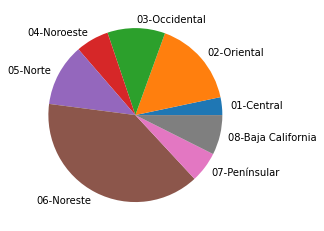

In [ ]:
plt.pie(ciclos["Capacidad Firme (MW)"], labels = ciclos["Región de Control"])

# Plotly: Gráficos interactivas

In [ ]:
import plotly.express as px
px.pie(ciclos, values = "Capacidad Firme (MW)", names = "Región de Control", title = "Capacidad de Ciclo Combinado")